## Ex.1 Visualizing data from "Titanic" dataset

*3 points*

This exercise is based on dataset from the legendary [Kaggle](kaggle.com) Titanic ML competition avaiable [here](https://www.kaggle.com/competitions/titanic/overview).

Data and their description can be downloaded from [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).




#### 1.1 Import the necessary libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

#### 1.2 Import the dataset from [here](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Titanic_Desaster/train.csv)

In [64]:
file_path = "/content/train.csv"
df = pd.read_csv(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1.3  Set PassengerId as the index

In [ ]:
df.set_index('PassengerId', inplace=True)
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### 1.4 Create a pie chart presenting the male/female proportion

* for all passangers
* for surviving passengers

What is your conclusion?


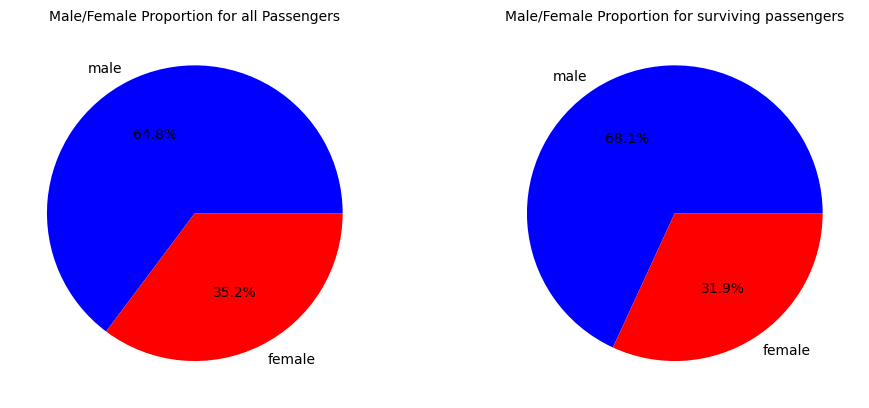

In [ ]:
all_passengers = df['Sex'].value_counts()
surviving_passengers = df[df['Survived'] == 1]['Sex'].value_counts()

plt.figure()
plt.subplot(1, 2, 1)
plt.pie(all_passengers, labels=all_passengers.index, colors=['blue', 'red'], autopct='%1.1f%%')
plt.title('Male/Female Proportion for all Passengers', fontsize=10)

plt.subplot(1, 2, 2)
plt.pie(surviving_passengers, labels=all_passengers.index, colors=['blue', 'red'], autopct='%1.1f%%')
plt.title('Male/Female Proportion for surviving passengers', fontsize=10)

plt.subplots_adjust(right=1.5)
plt.show()



**conclusion:**


   *the proportion of males among surviving passengers is higher compared to the proportion of males among all passengers, it might suggest that males had a higher survival rate compared to females.*


#### 1.5. Create a scatterplot with the Fare payed and the Age, differ the plot color by gender

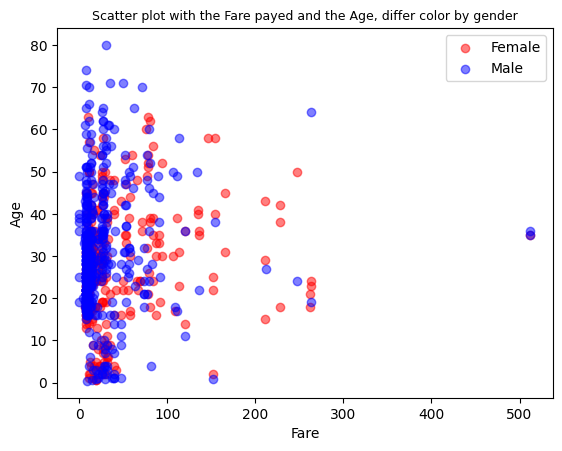

In [ ]:
f = df[df['Sex'] == 'female']
m = df[df['Sex'] == 'male']

plt.figure()
plt.subplot(1, 1, 1)

plt.scatter(f['Fare'], f['Age'], color='red', label='Female', alpha=0.5)
plt.scatter(m['Fare'], m['Age'], color='blue', label='Male', alpha=0.5)
plt.legend()

plt.ylabel('Age')
plt.xlabel('Fare')
plt.title('Scatter plot with the Fare payed and the Age, differ color by gender', fontsize=9)
plt.show()

Which chart would be more clear in your opinion?

*Scatter Plot*

#### 1.6 How many men older 45 survived?

In [ ]:

men_older_45_survived = df[(df['Sex'] == 'male') & (df['Survived'] == 1) & (df['Age'] > 45)]
print('The number of men older than 45 who survived:', men_older_45_survived.shape[0])

The number of men older than 45 who survived: 12


#### 1.7  Create a histogram with the Fare payed

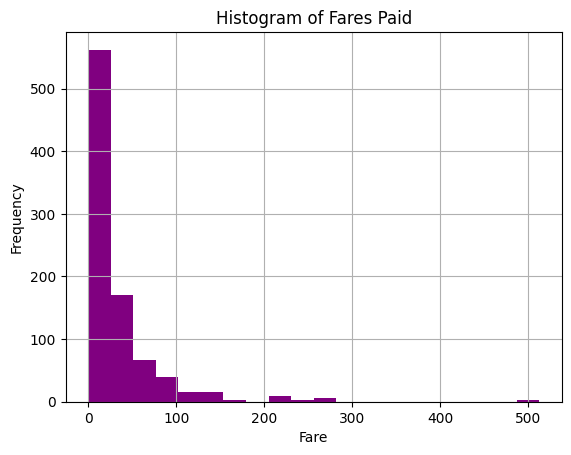

In [ ]:
df['Fare'].hist(bins=20, color='purple')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.title('Histogram of Fares Paid')
plt.show()

#### 1.8 Сreate your own chart that you think would be useful

---



---



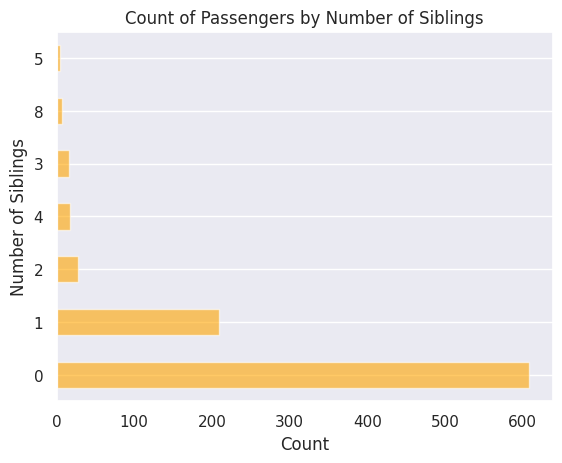

In [72]:
sibsp_count = df['SibSp'].value_counts()

plt.figure()
sibsp_count.plot(kind='barh', color='orange', alpha=0.6)
plt.xlabel('Count')
plt.ylabel('Number of Siblings')
plt.title('Count of Passengers by Number of Siblings')
plt.grid(axis='x')
plt.show()

So, I hope this simple exercise did not cause you any difficulties. Time to move on to the next task. There is no longer any instruction on what charts to draw. You must decide for yourself






## Ex.2 Visualizing data from "Hose Prices" dataset

*7 points*

With 79 independent variables describing (nearly) every aspect of residential buildings in Ames, Iowa, this competition challenges you to predict the final price of each home.

In the very first step of your analysis, you need to
1. define the type of variab-les
2. visualize data
3. which variables do you think would be useful to transform?

The data and their description are [here](https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()


In [ ]:
file_path = "/content/house_train.csv"
df = pd.read_csv(file_path)

**1. define the type of variables :**

In [ ]:

data_types = []
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:
        data_types.append((column, 'Numerical'))
    else:
        data_types.append((column, 'Categorical'))

df_types = pd.DataFrame(data_types, columns=['Column Name', 'Type'])

print(df_types)

      Column Name         Type
0              Id    Numerical
1      MSSubClass    Numerical
2        MSZoning  Categorical
3     LotFrontage    Numerical
4         LotArea    Numerical
..            ...          ...
76         MoSold    Numerical
77         YrSold    Numerical
78       SaleType  Categorical
79  SaleCondition  Categorical
80      SalePrice    Numerical

[81 rows x 2 columns]


**2. visualize data:**

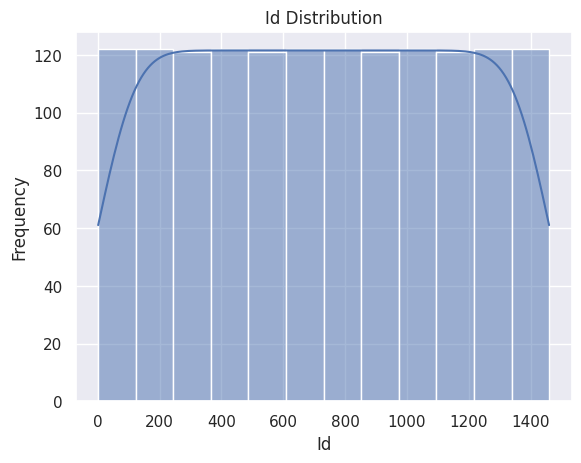

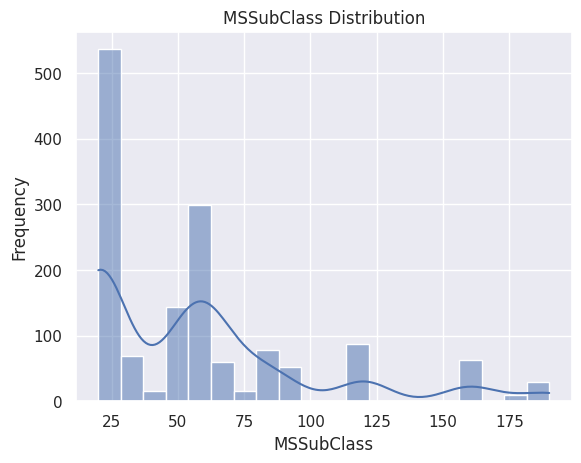

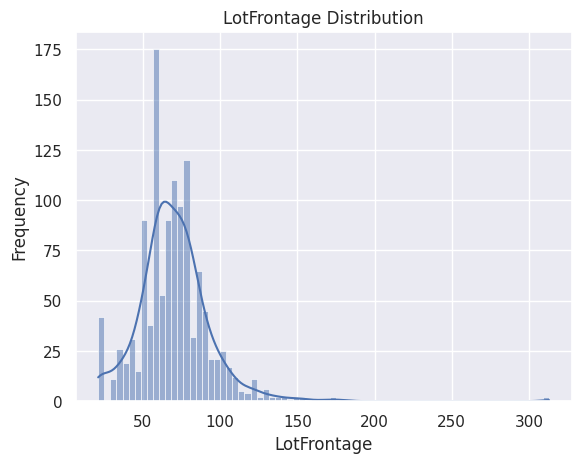

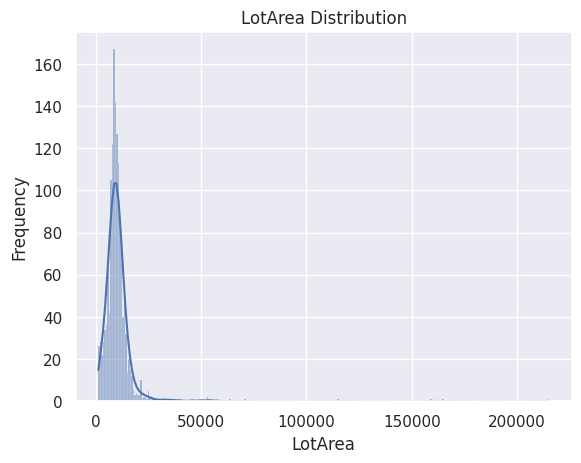

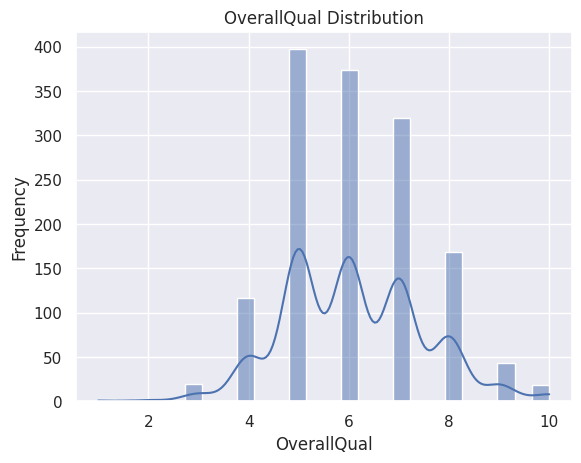

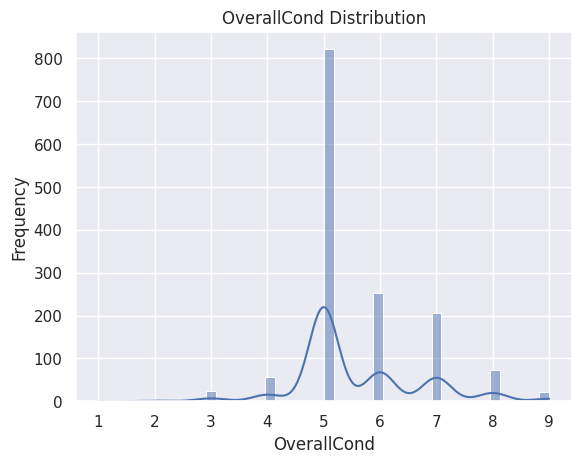

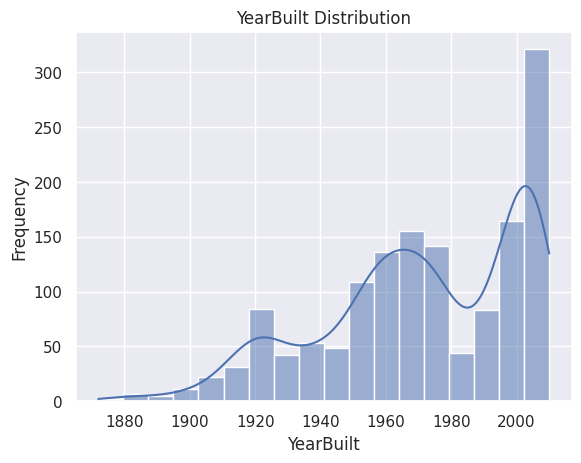

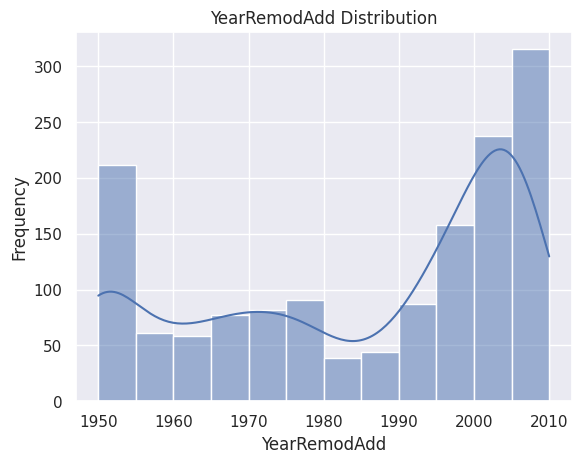

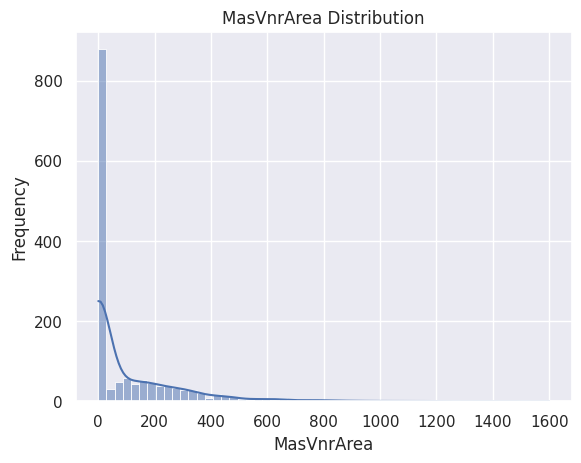

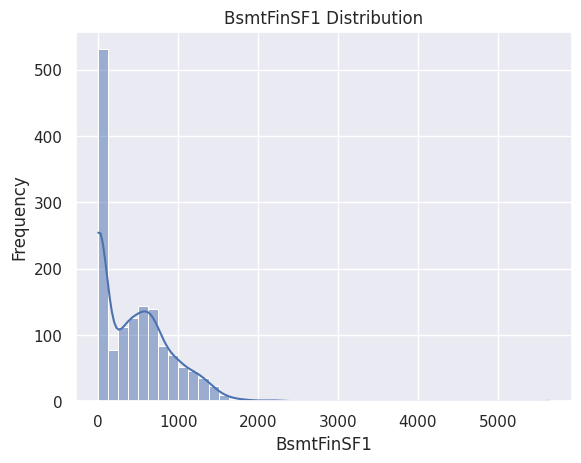

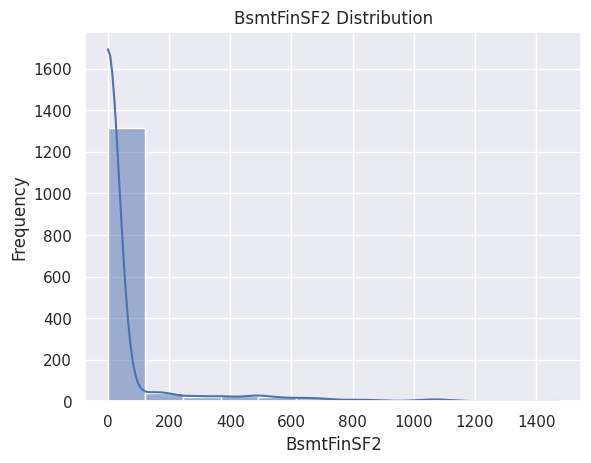

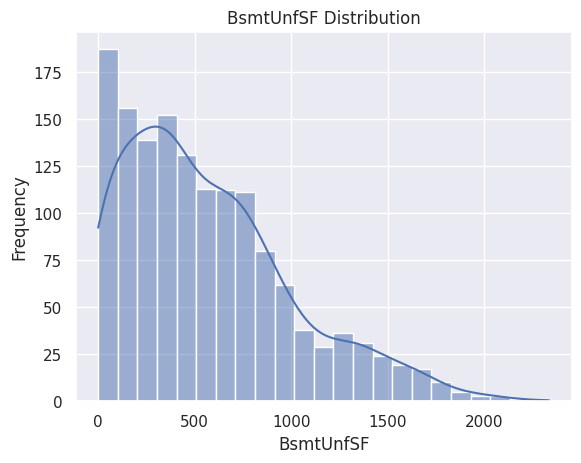

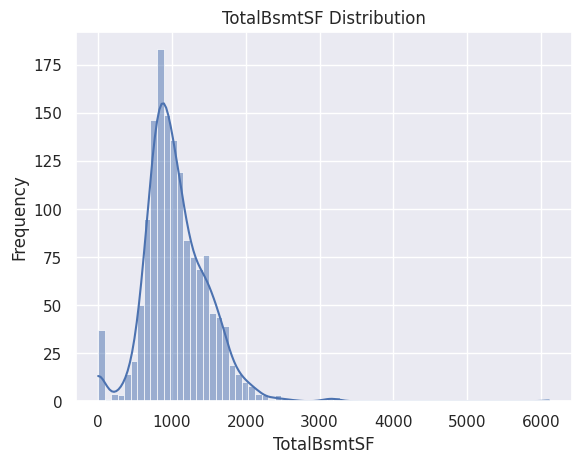

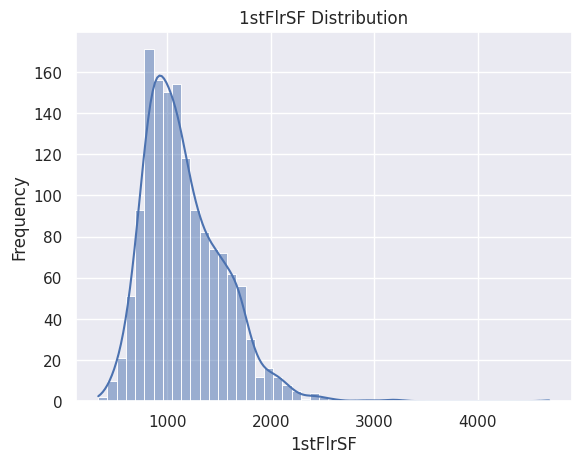

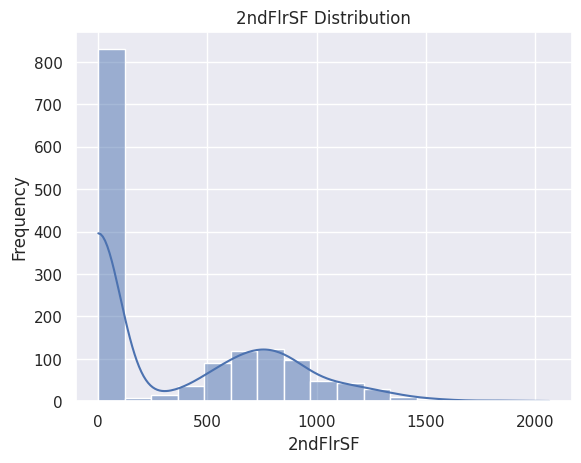

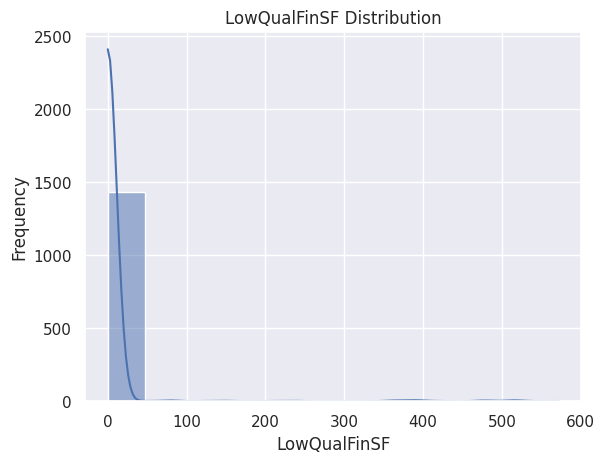

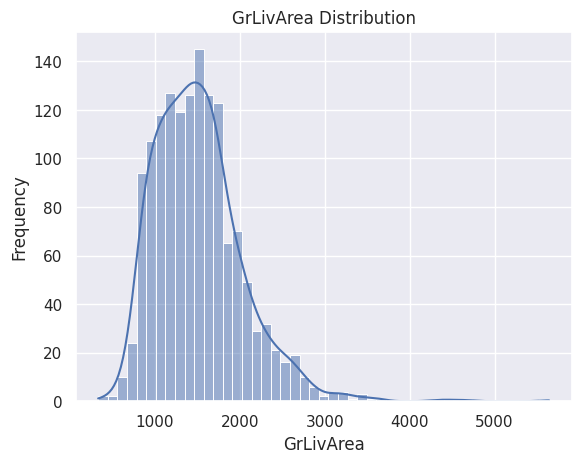

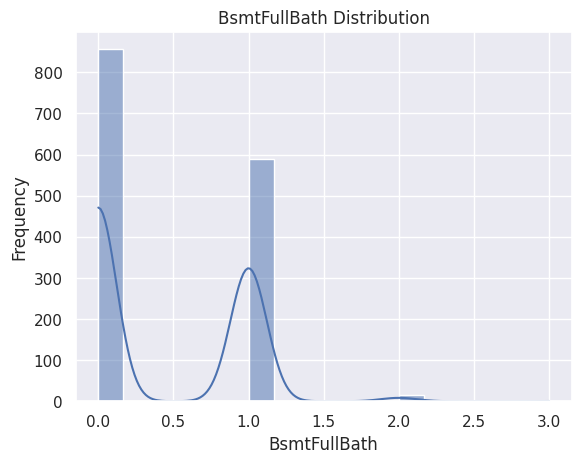

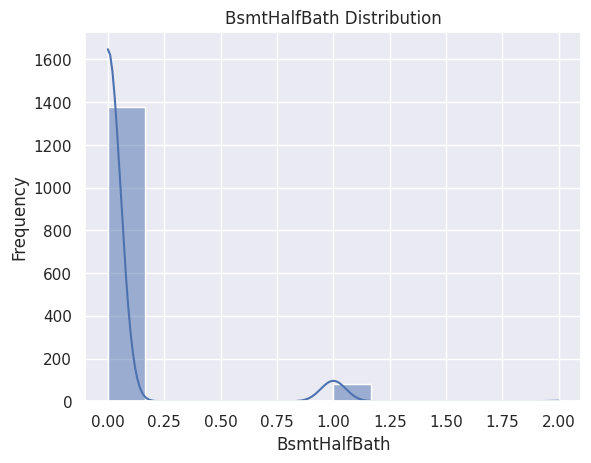

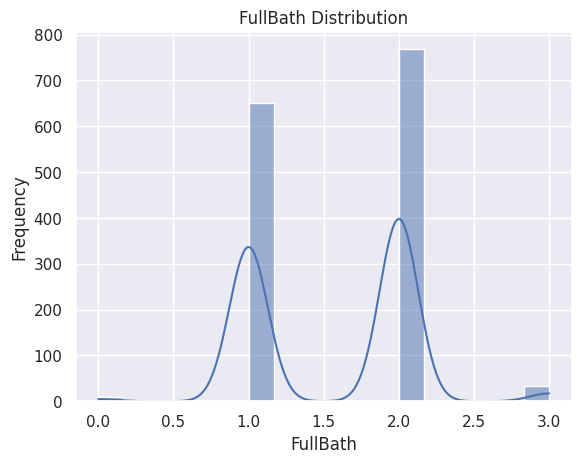

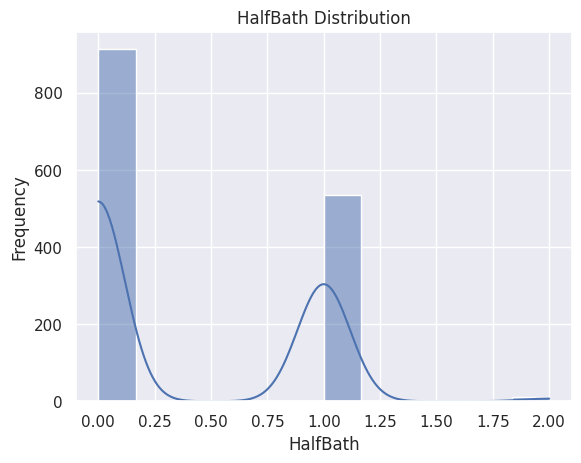

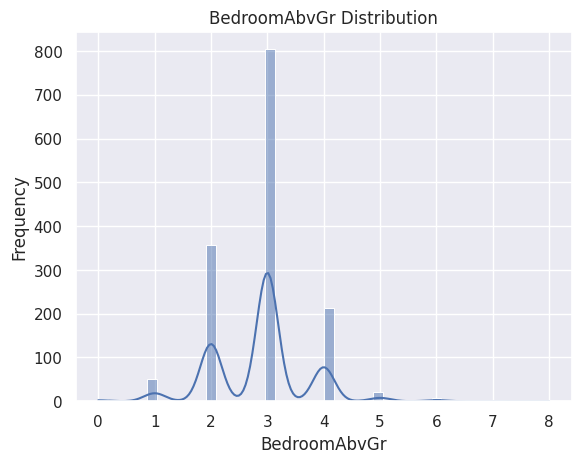

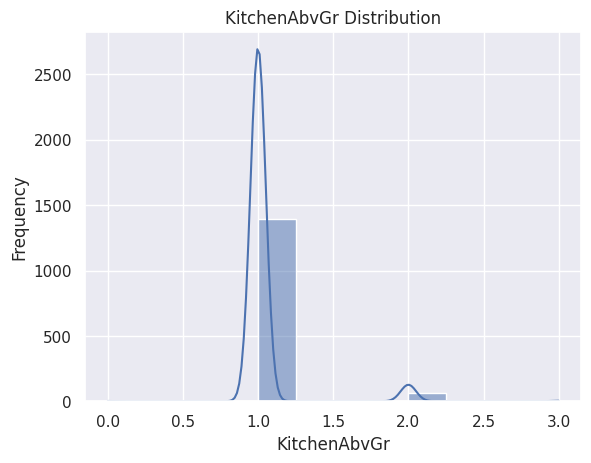

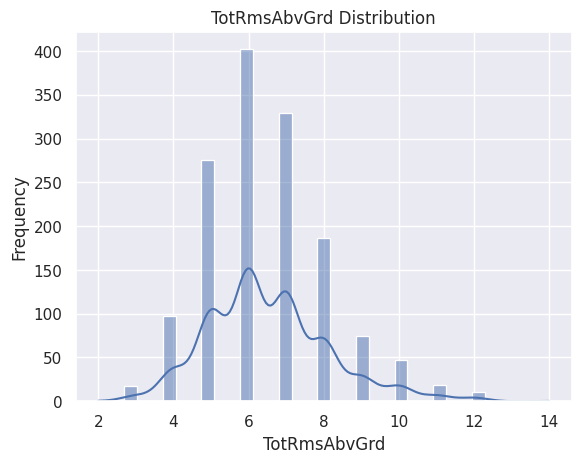

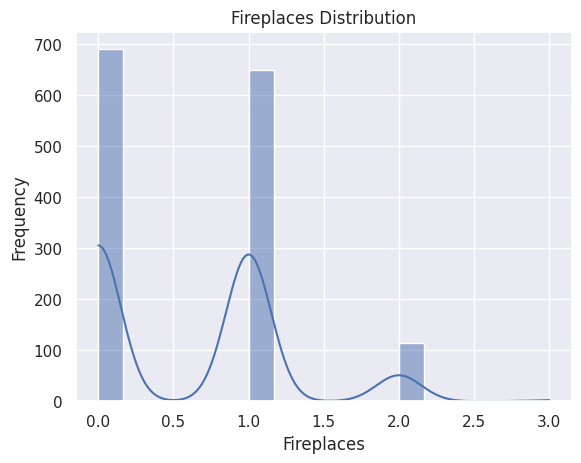

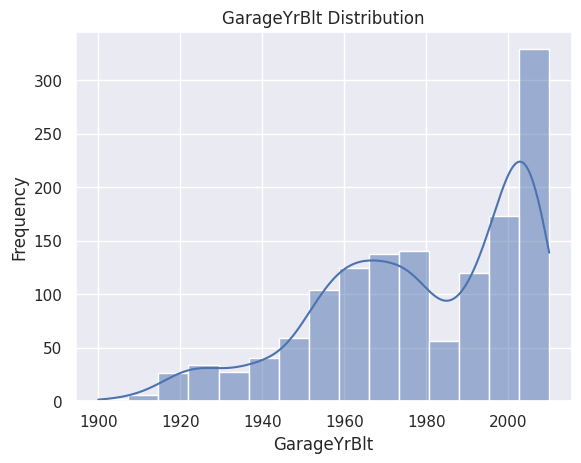

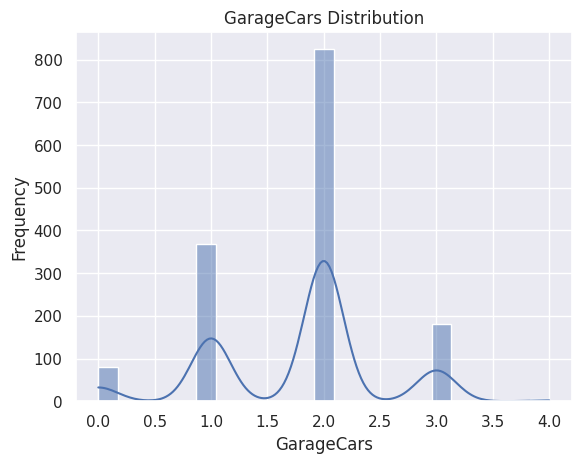

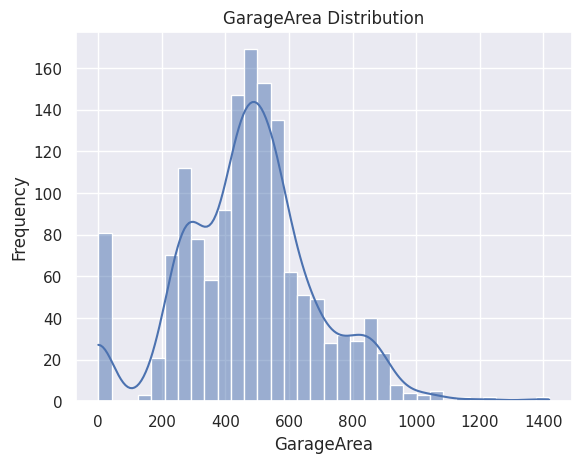

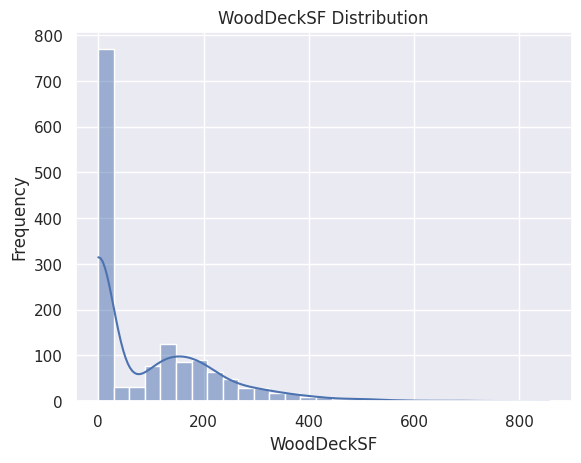

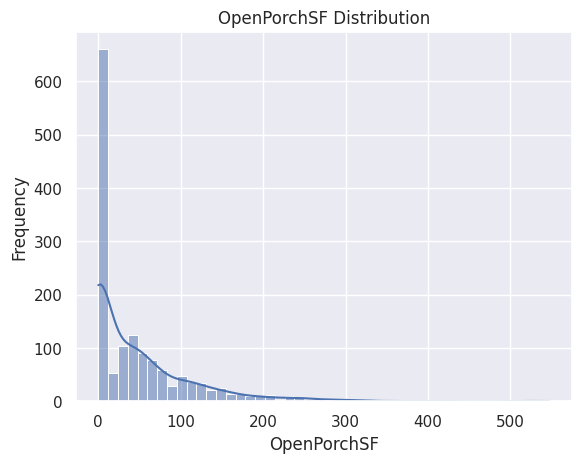

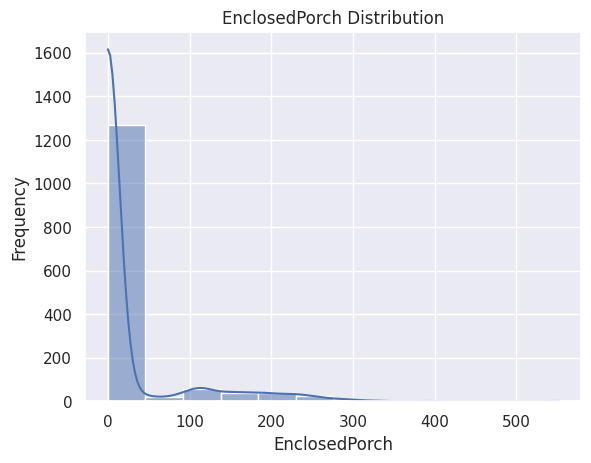

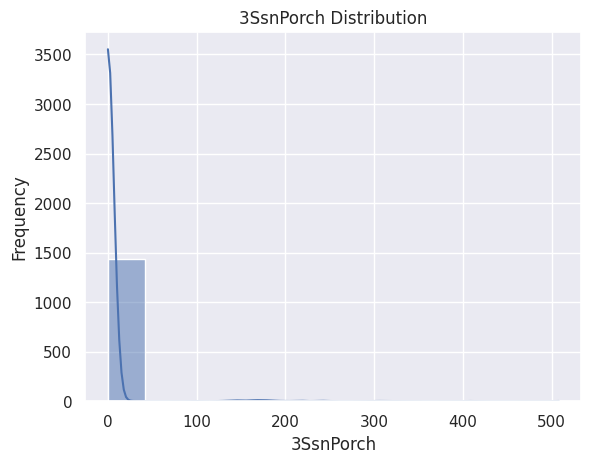

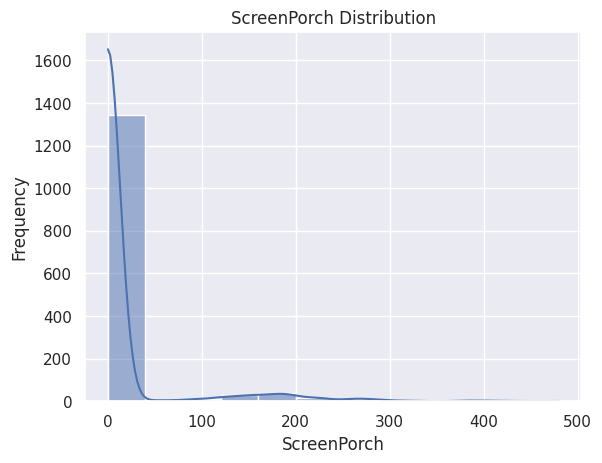

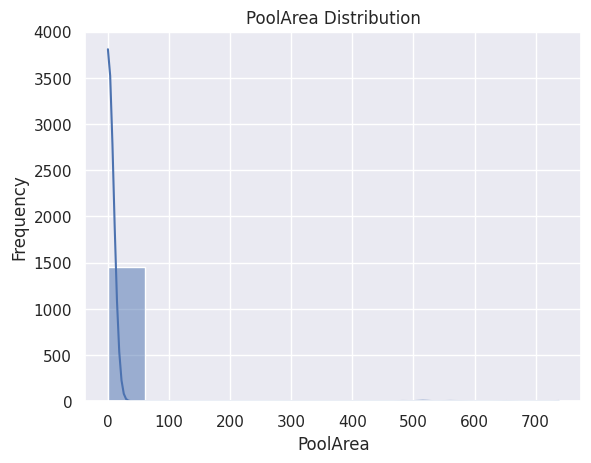

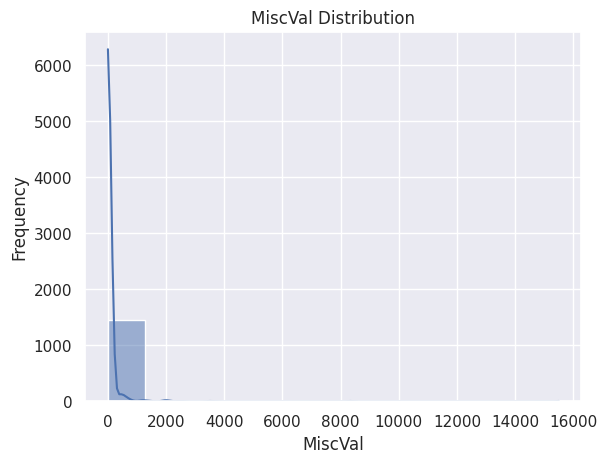

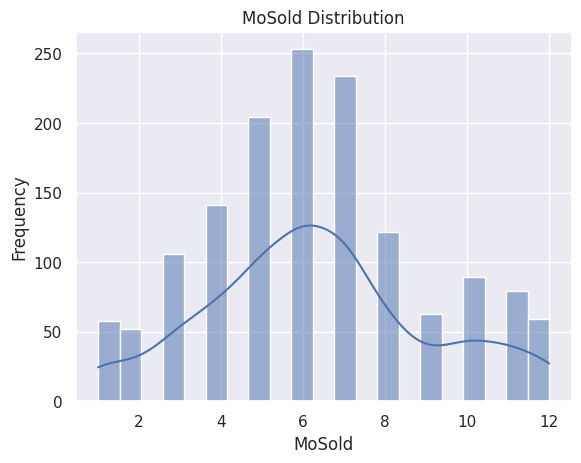

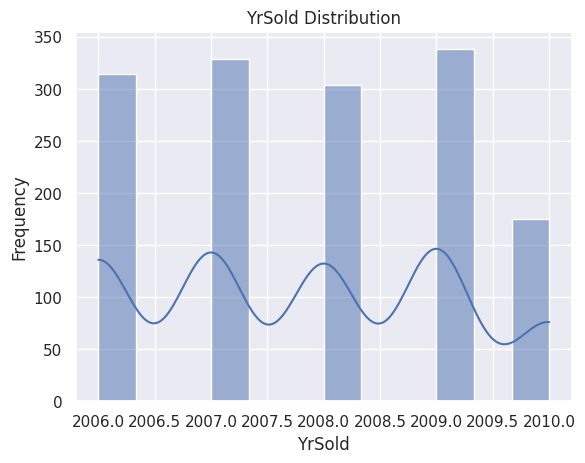

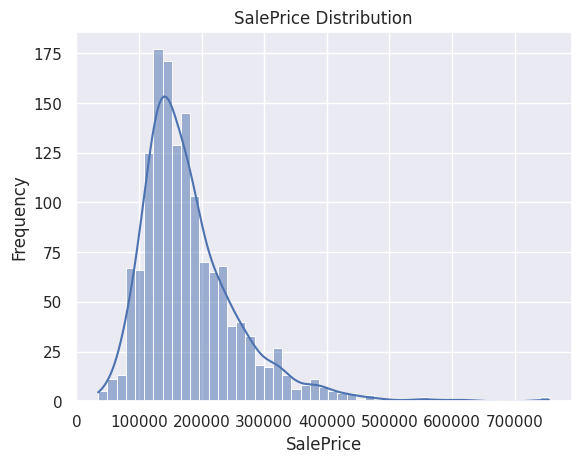

In [ ]:
# Plot histograms for numerical columns

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure()
    sns.histplot(df[column], kde=True)
    plt.title(f'{column} Distribution')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

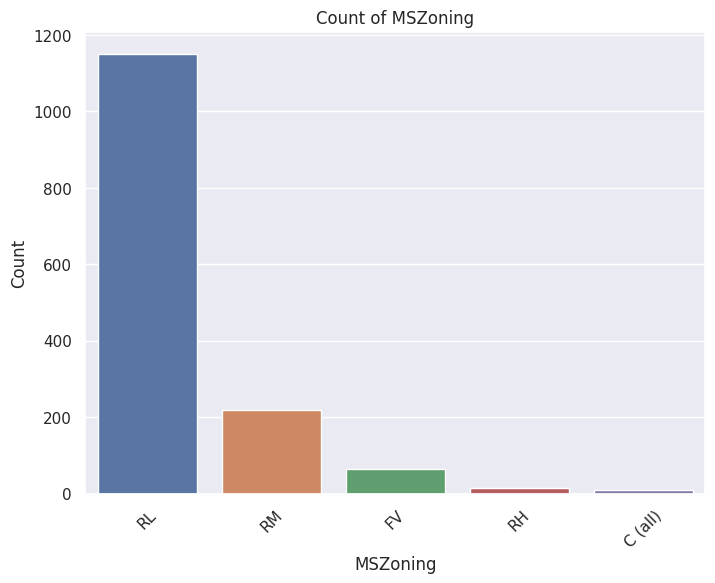

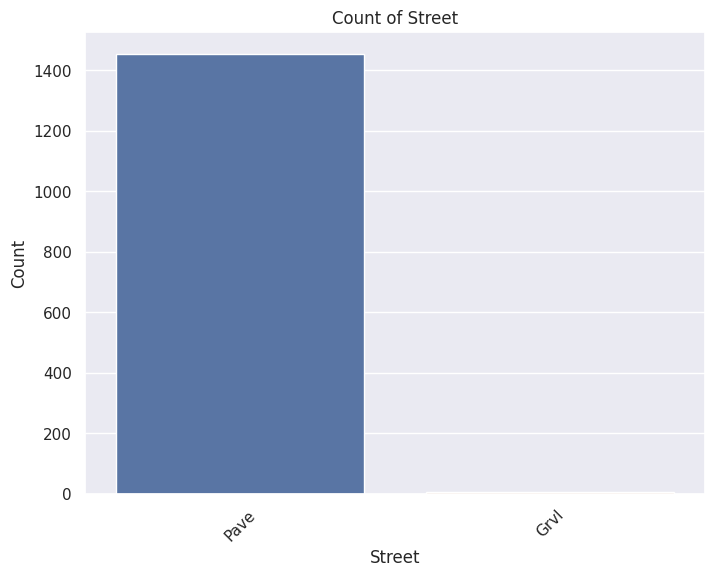

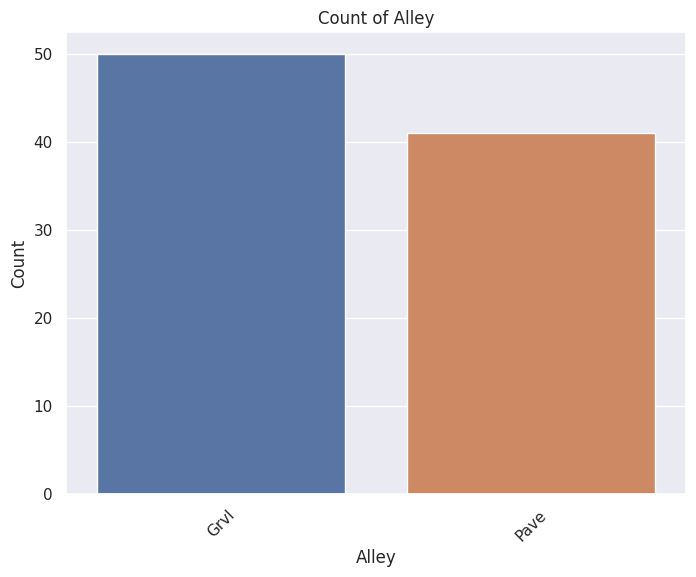

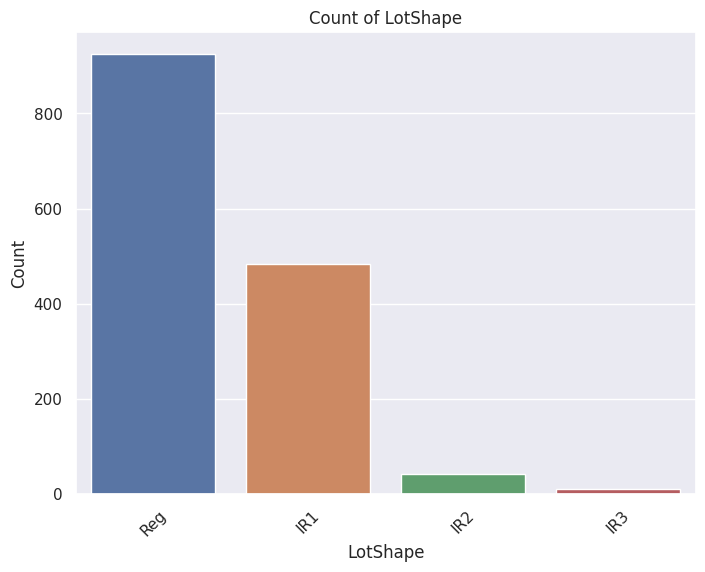

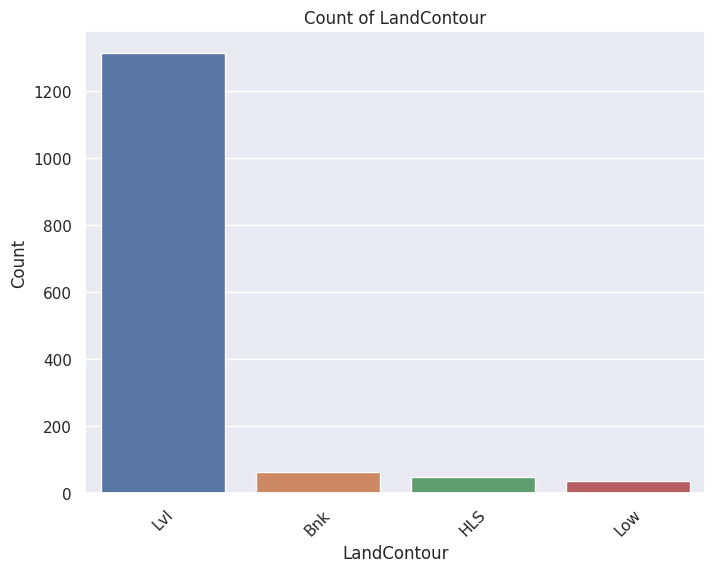

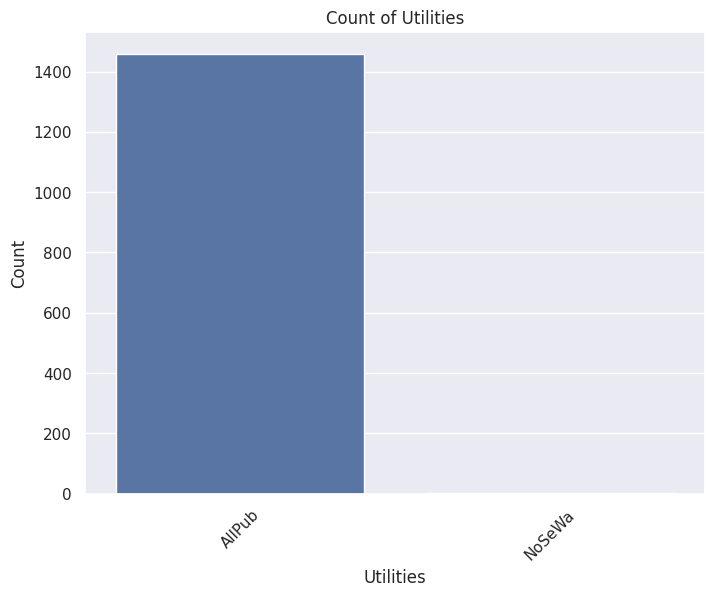

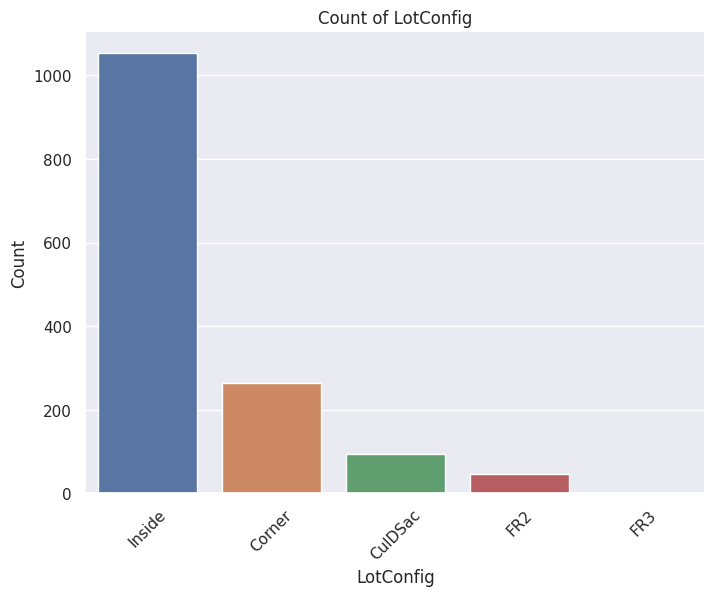

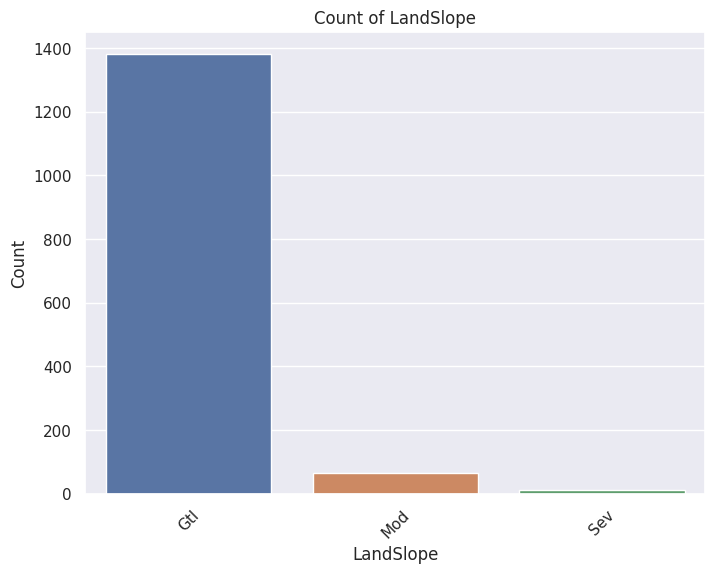

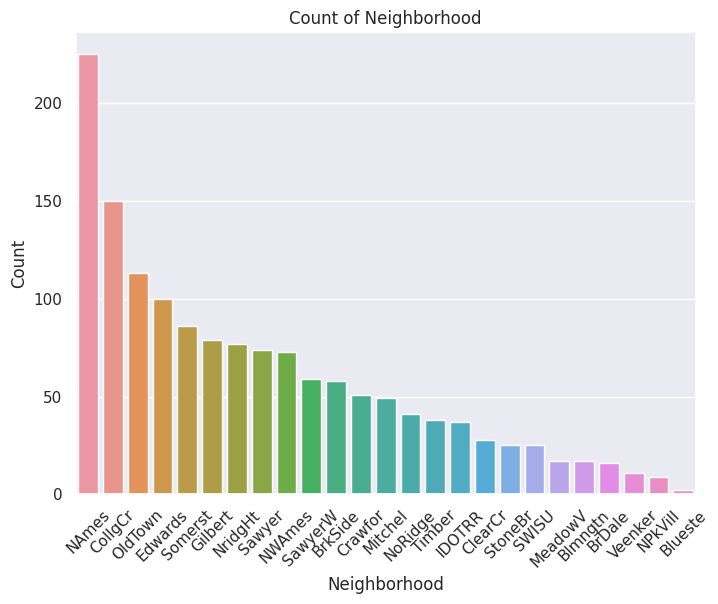

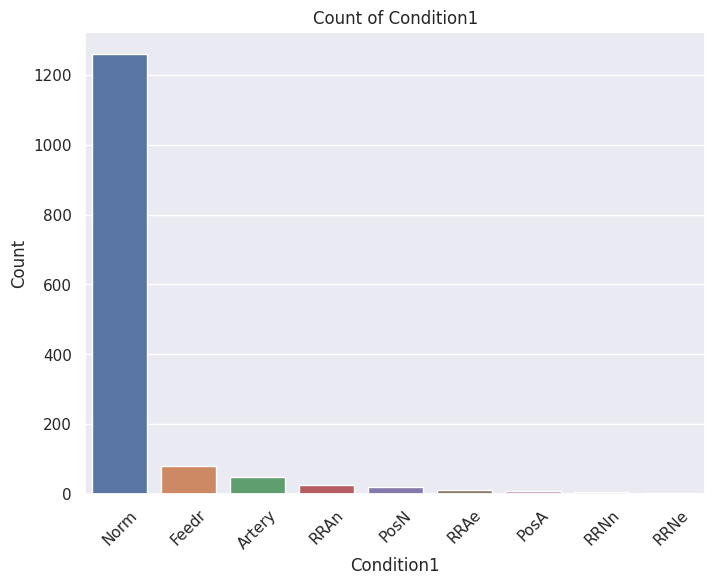

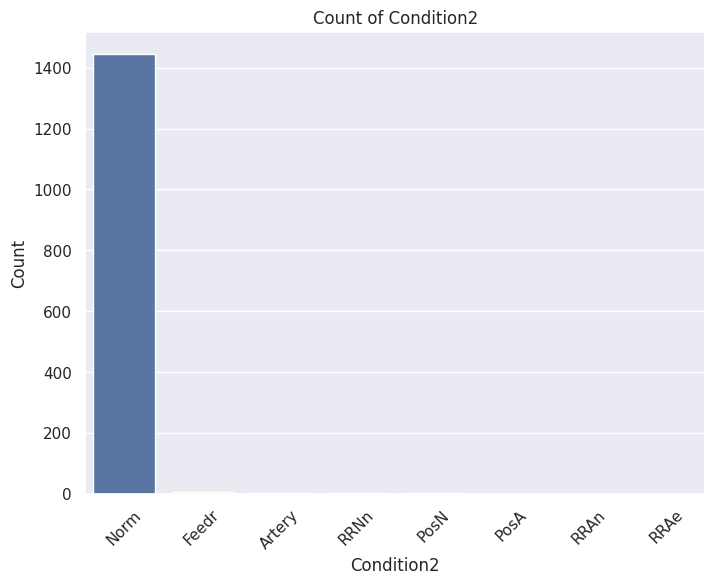

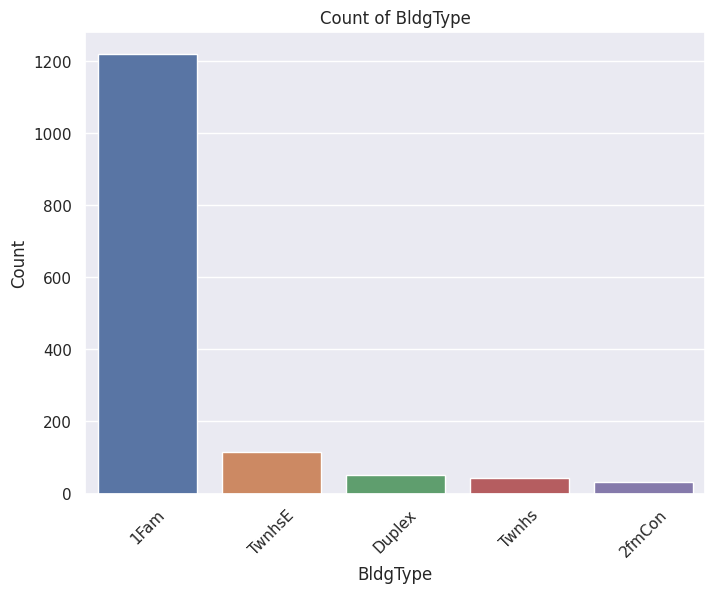

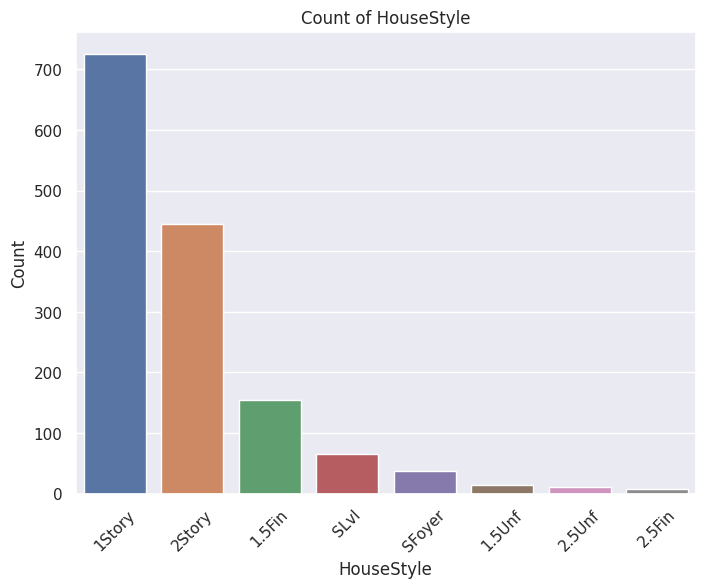

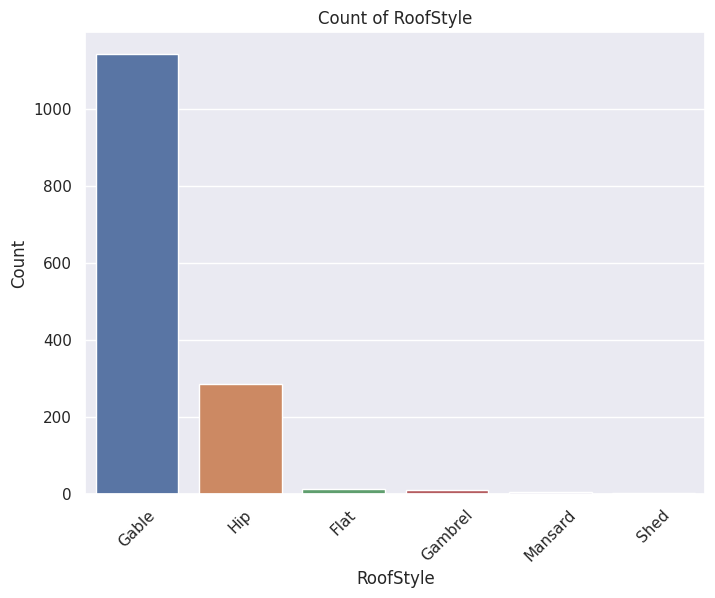

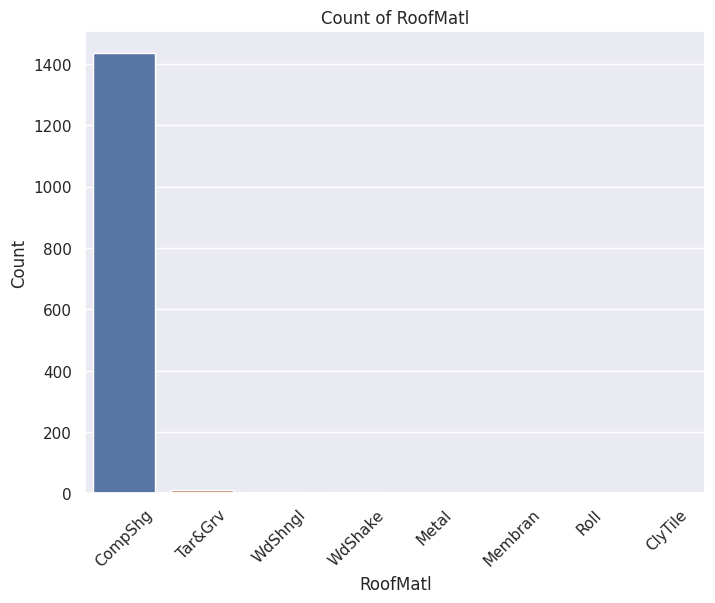

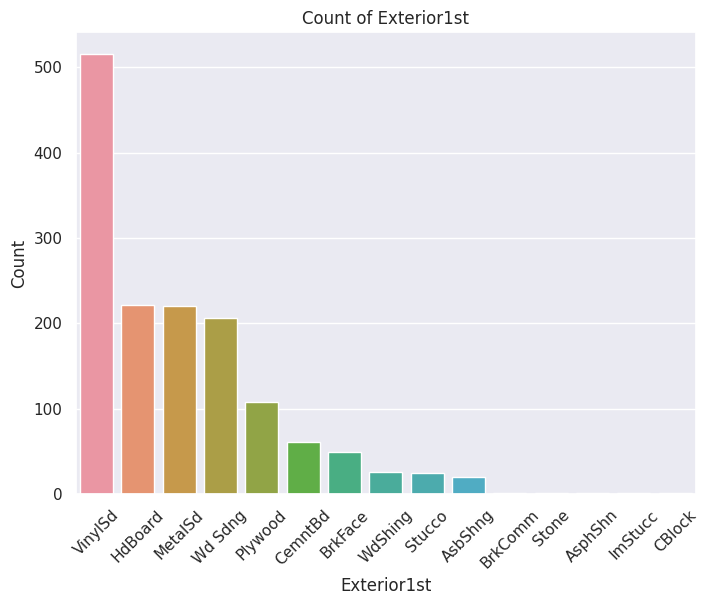

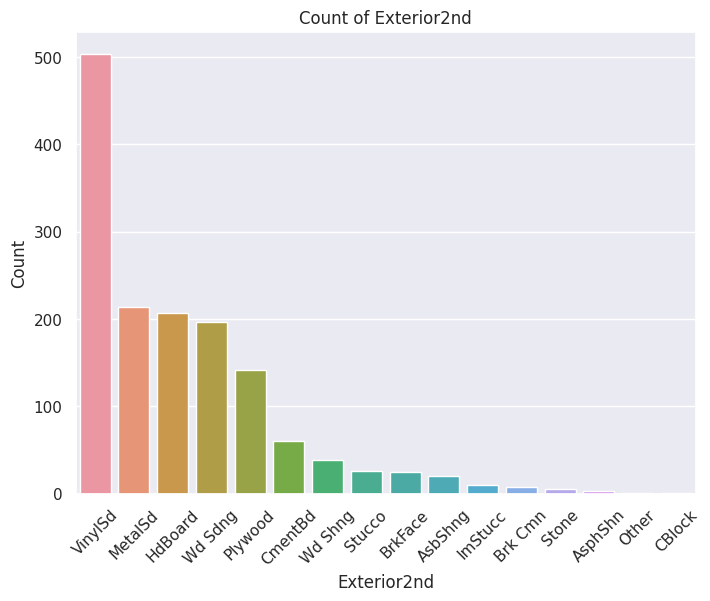

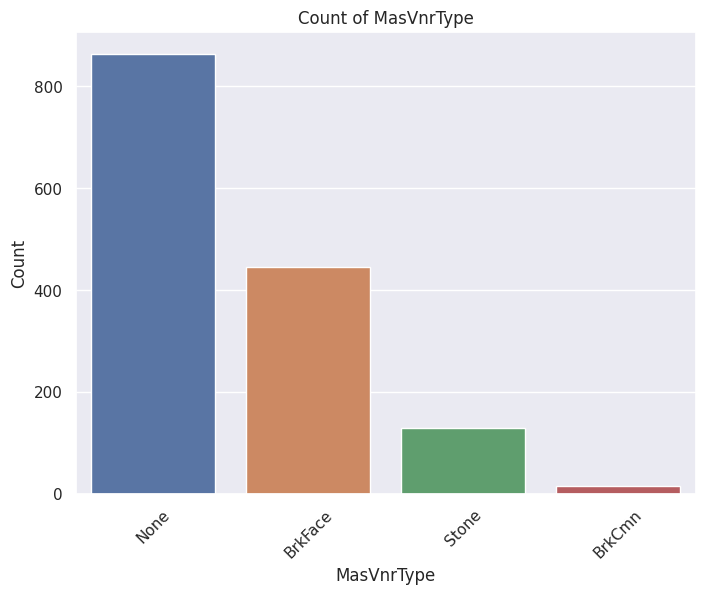

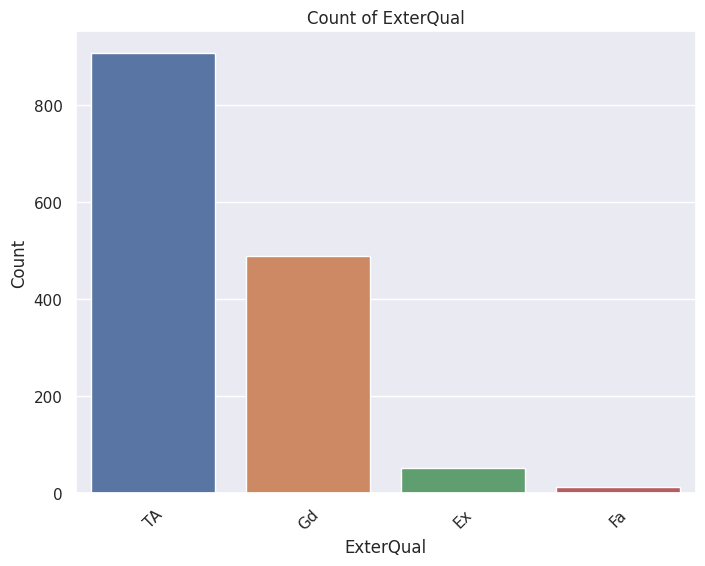

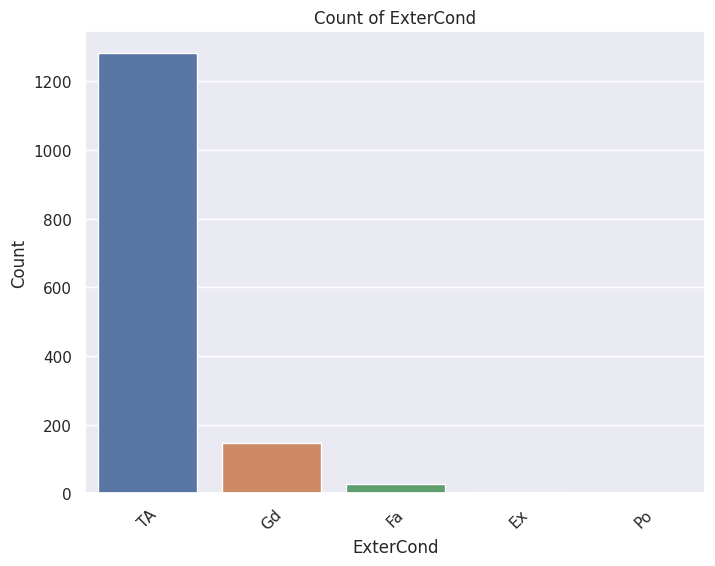

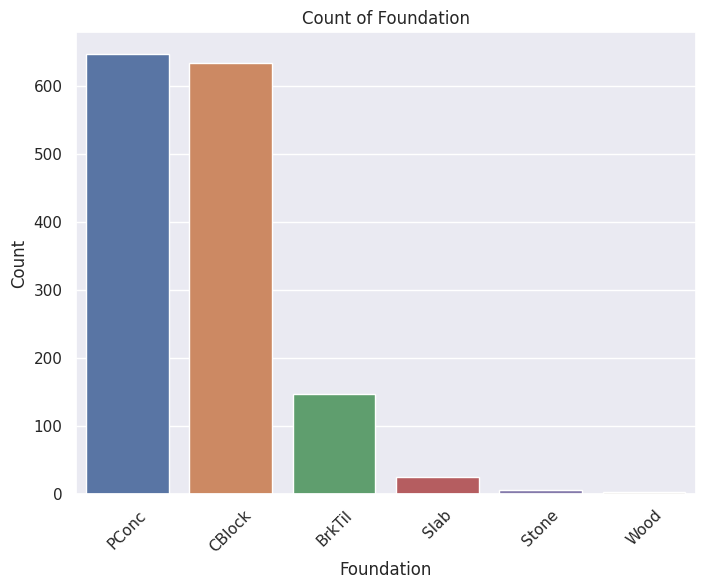

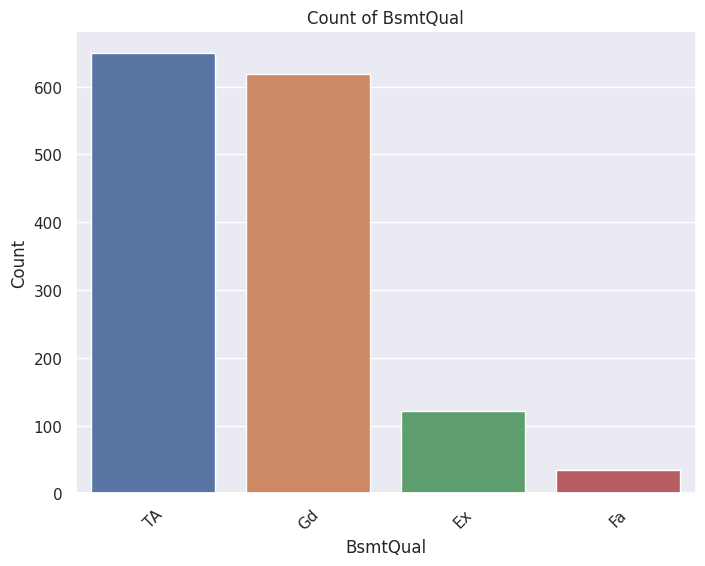

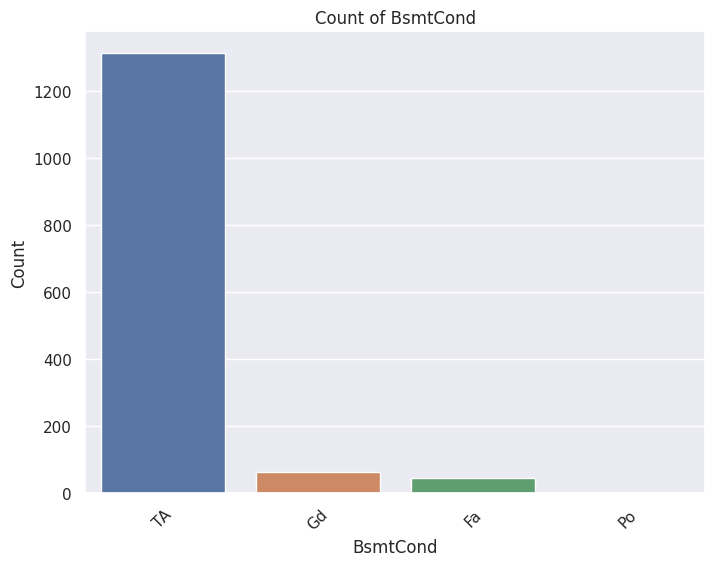

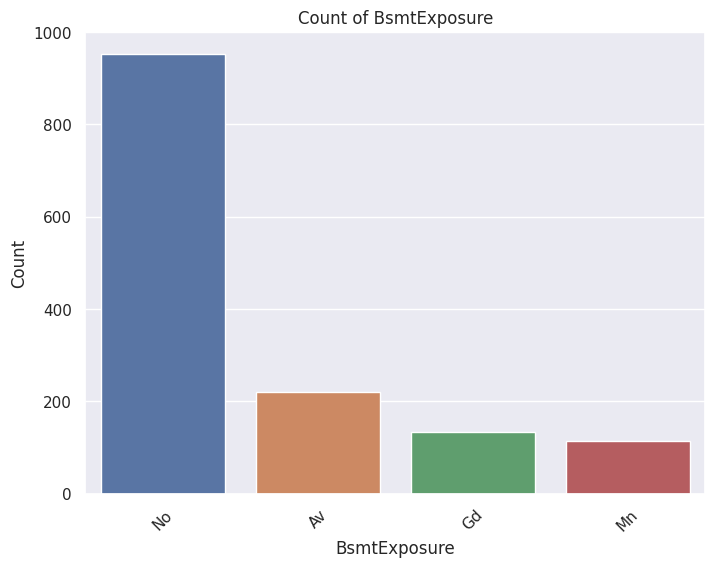

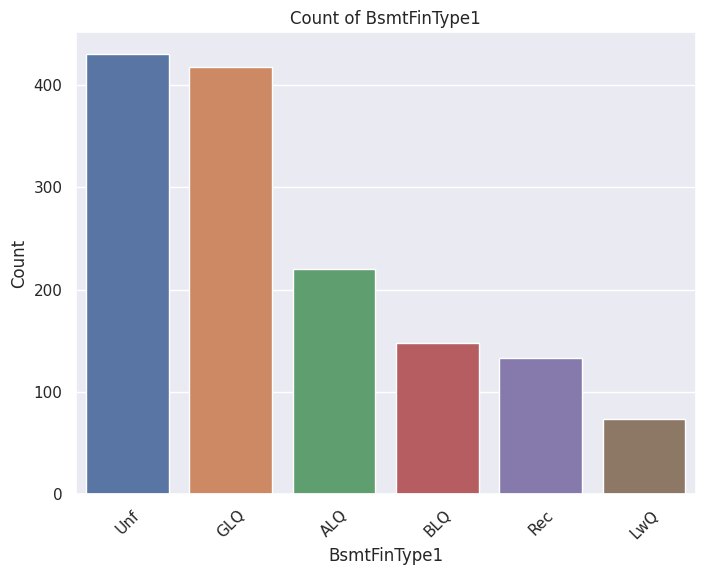

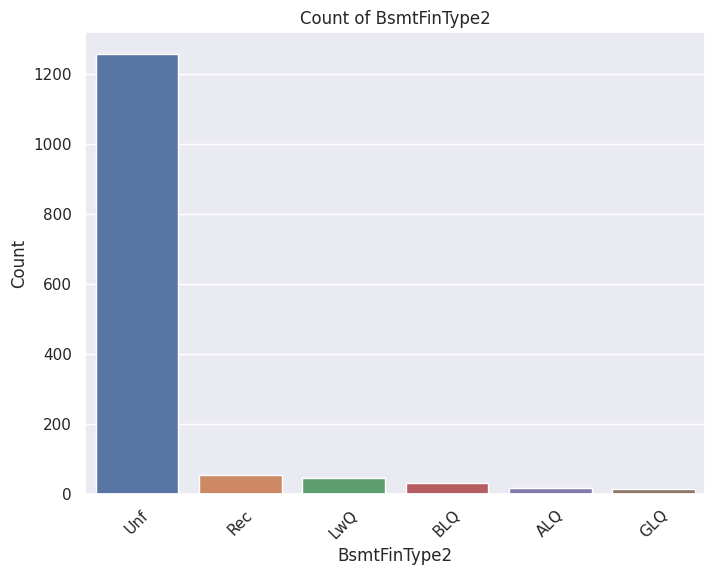

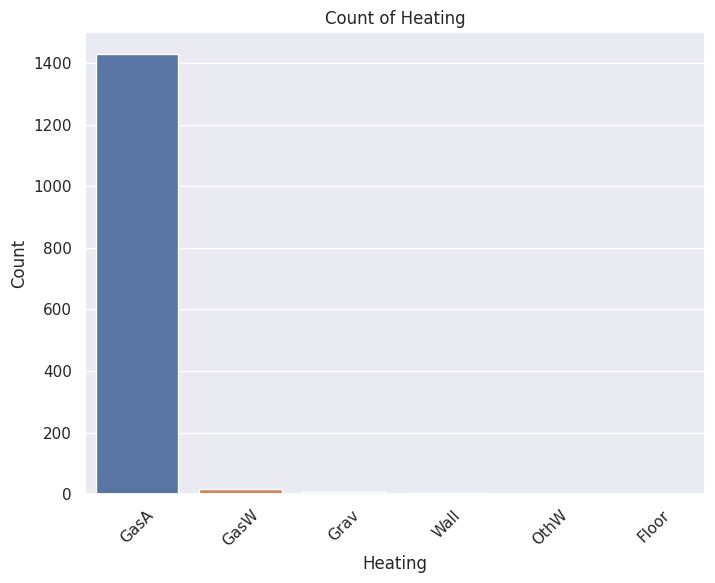

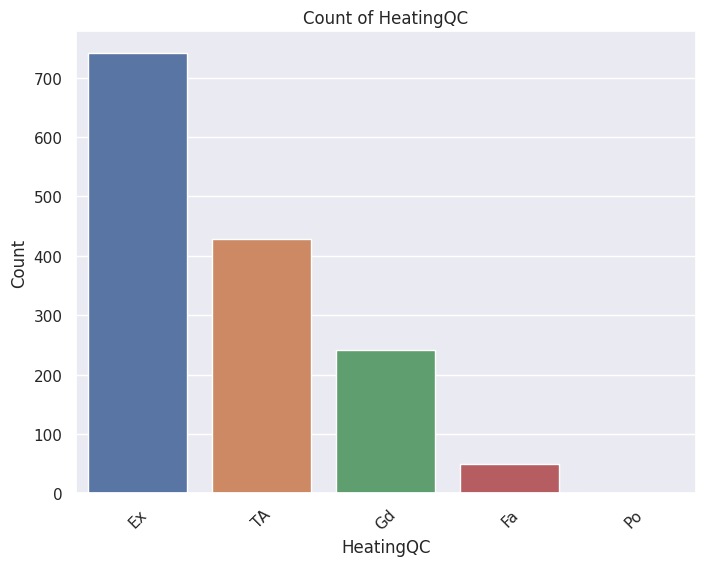

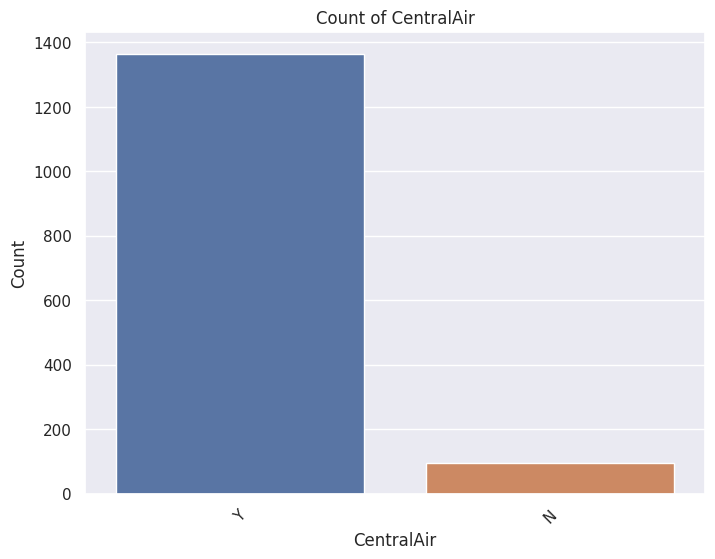

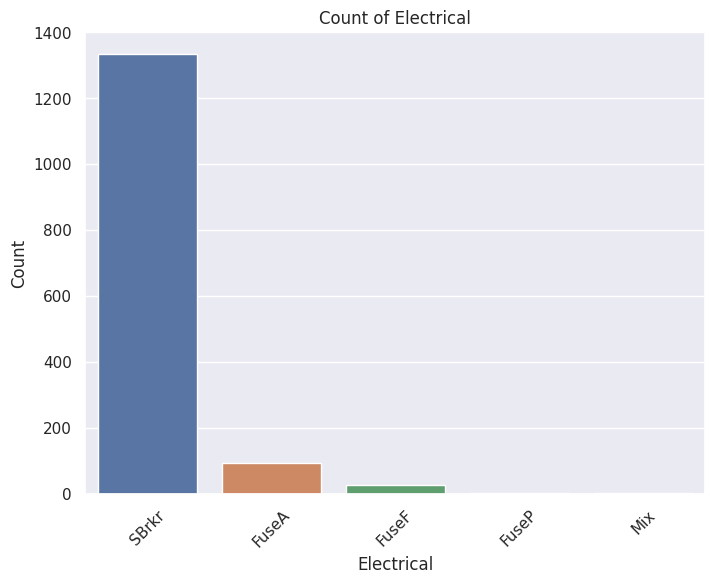

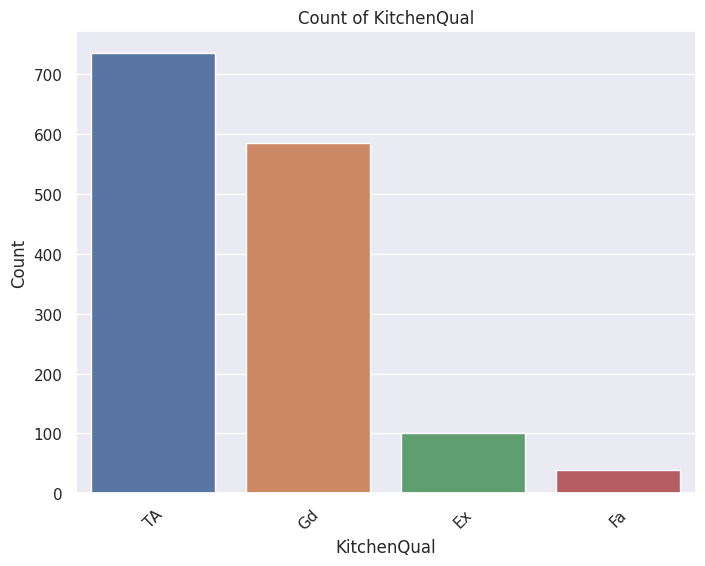

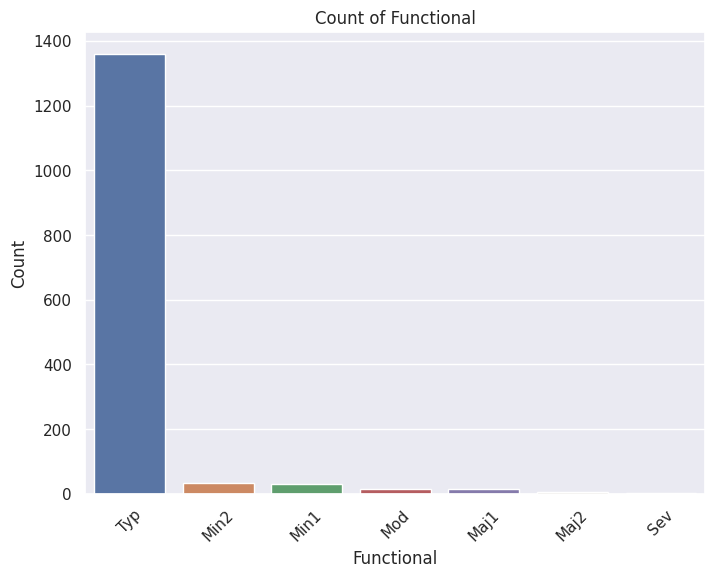

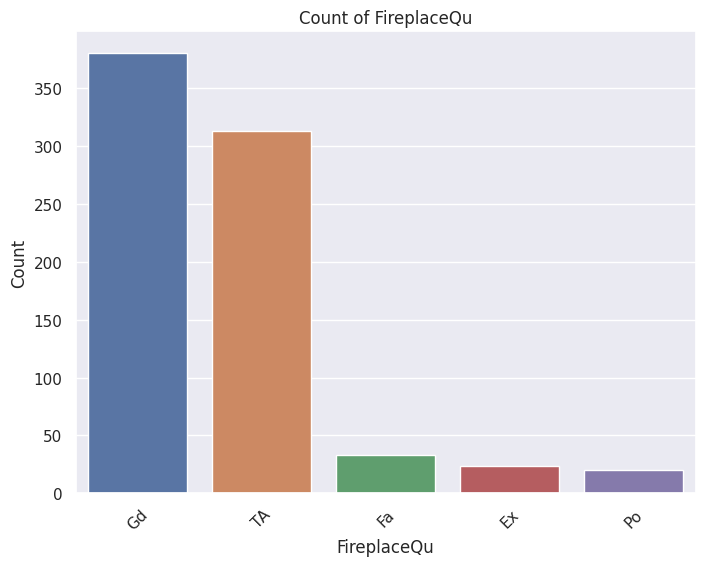

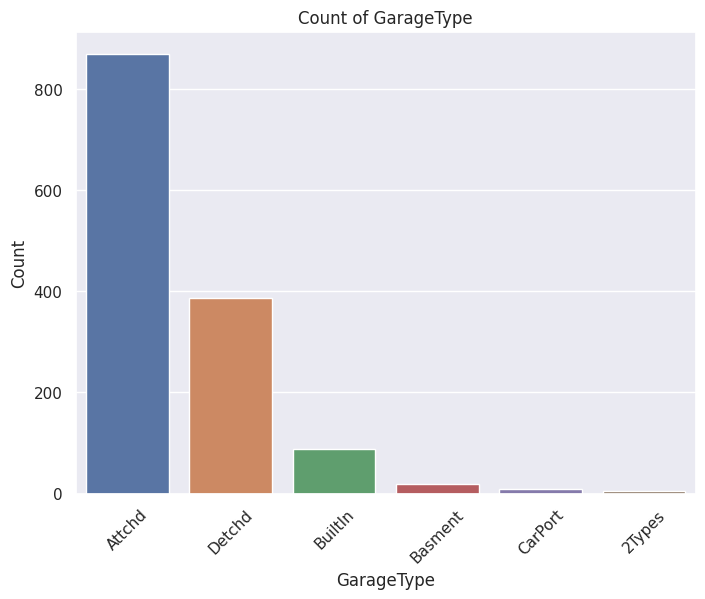

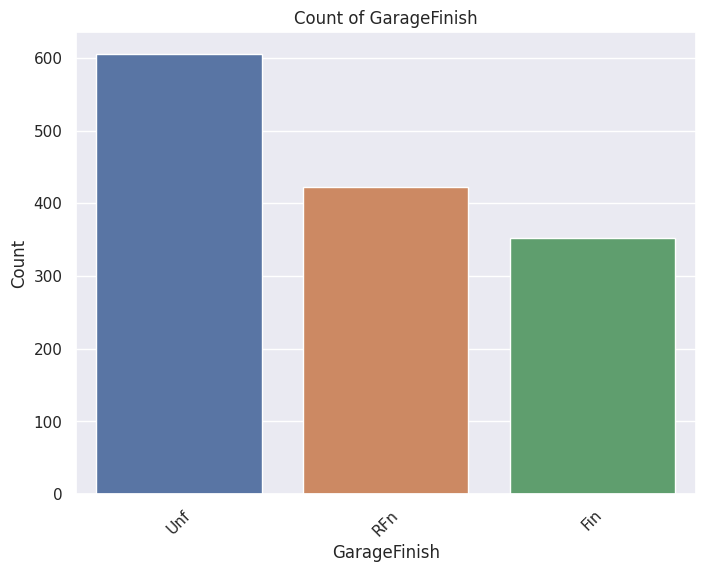

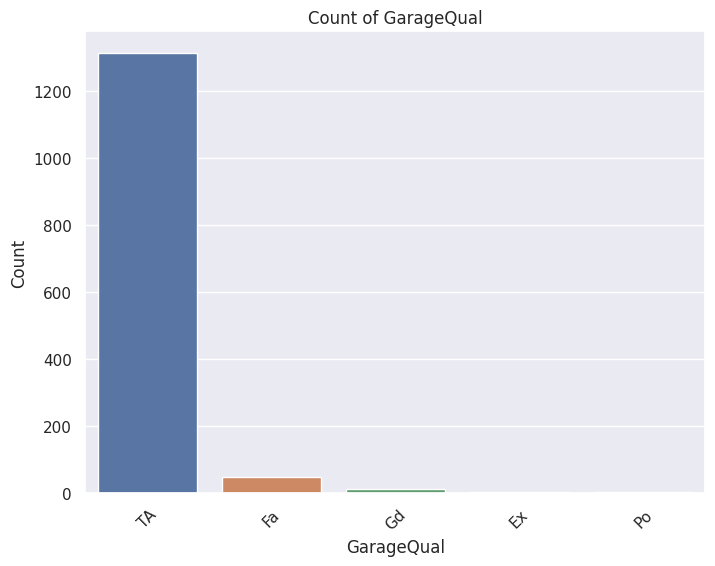

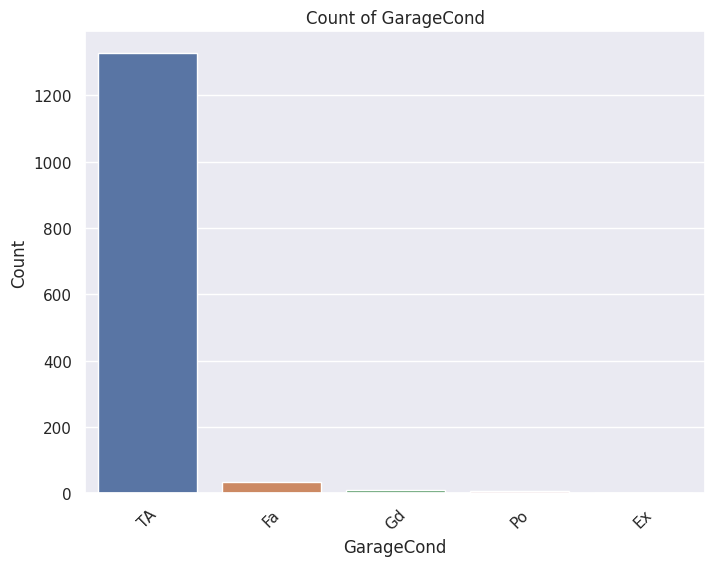

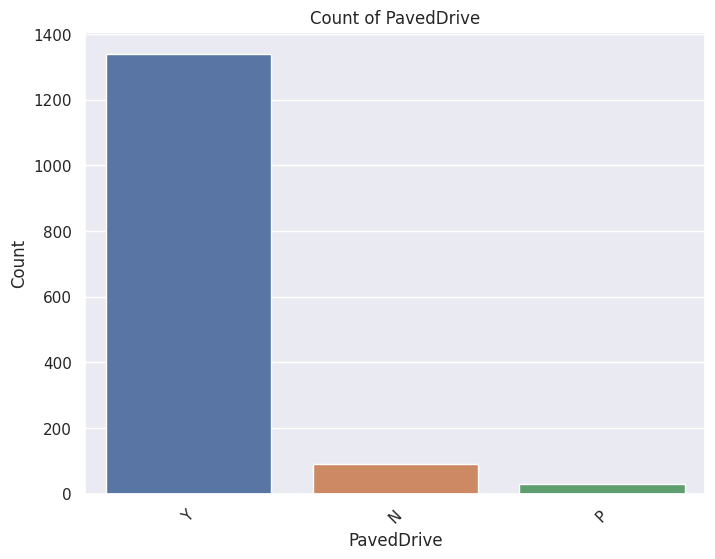

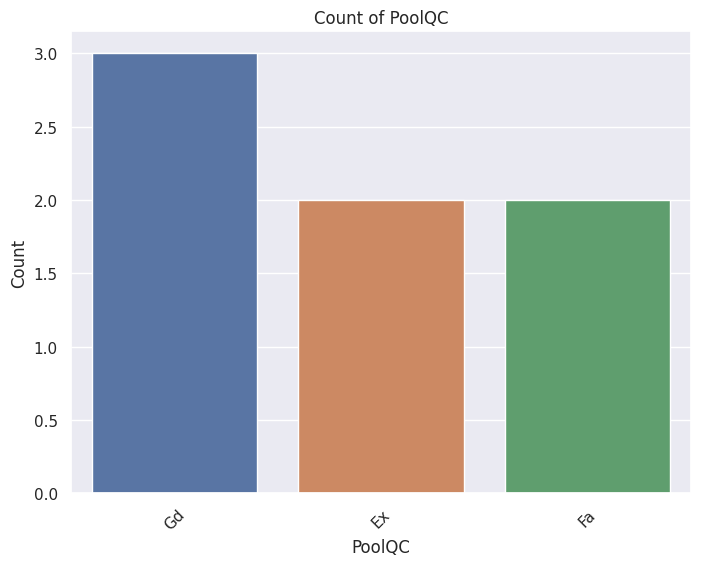

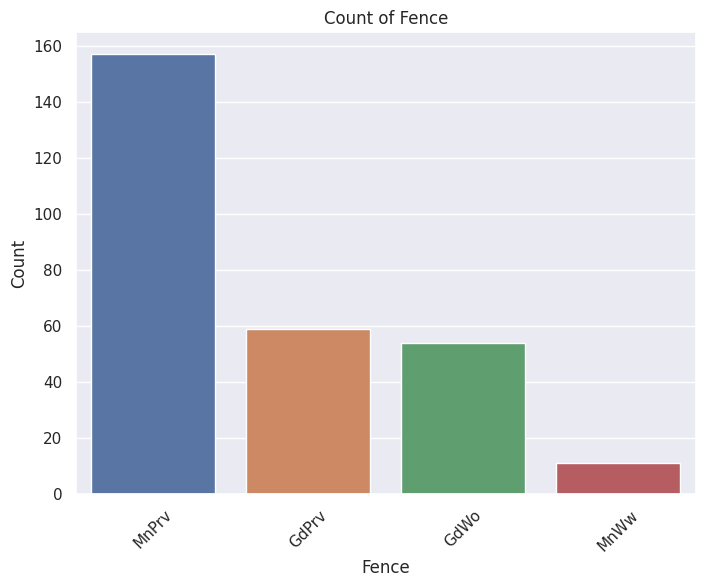

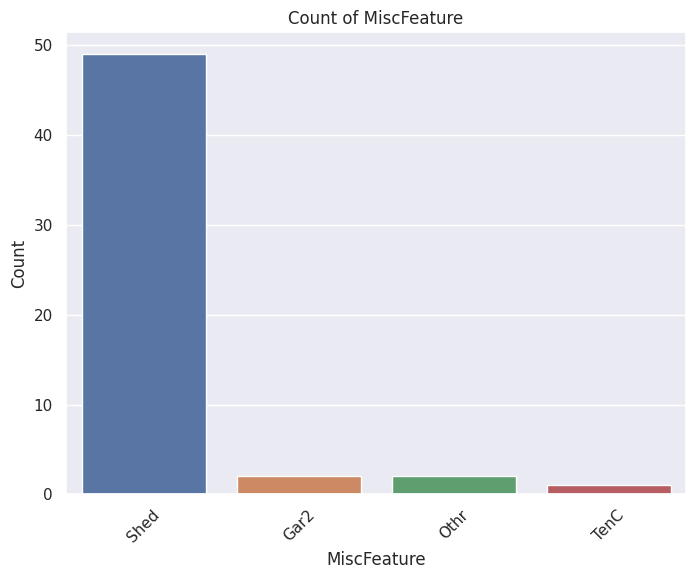

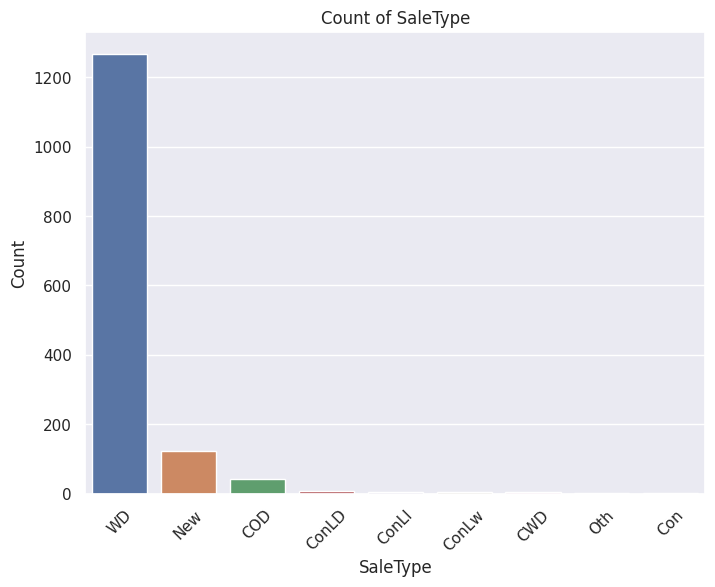

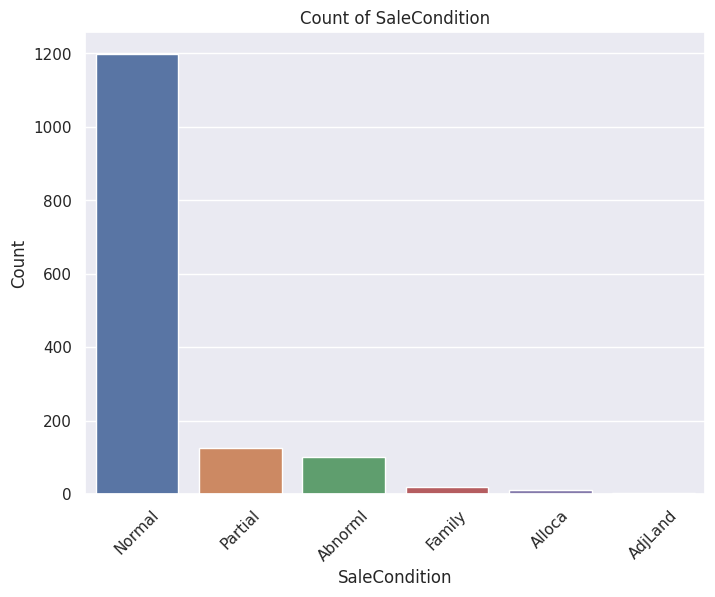

In [62]:
# Plot bar plots for categorical columns

categorical_columns = df.select_dtypes(include=['object']).columns

for column in categorical_columns:
    plt.figure()
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.title(f'Count of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

**3. which variables do you think would be useful to transform?**


- Skewed numerical variables.


- Categorical variables to numerical.